In [4]:
!pip install StringIO

  Could not find a version that satisfies the requirement StringIO (from versions: )
No matching distribution found for StringIO


In [89]:
d = {'lat' : [0,0.1,-0.1,0.4],
    'lng' : [50,50.1,49.6,49.5]}


df = pd.DataFrame(d)

feature_collection = {
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "type": "Polygon",
        "coordinates": [
          [
            [
              0,
              49
            ],
            [
              0.6,
              50
            ],
            [
              0.1,
              52
            ],
            [
              -1,
              51
            ]
          ]
        ]
      }
    },
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "type": "Point",
        "coordinates": [
          0,
          50
        ]
      }
    },
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "type": "Point",
        "coordinates": [
          0.1,
          50.1
        ]
      }
    },
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "type": "Point",
        "coordinates": [
          -0.1,
          49.6
        ]
      }
    },
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "type": "Point",
        "coordinates": [
          0.4,
          49.5
        ]
      }
    }
  ]
}

In [90]:
df

,lat,lng
0,0.0,50.0
1,0.1,50.1
2,-0.1,49.6
3,0.4,49.5


In [102]:
from shapely.geometry import shape, Point
# check each polygon to see if it contains the point

In [122]:
%%timeit
for row in df.itertuples():
    point = Point(row.lat, row.lng)
    if polygon.contains(point):
        pass
        # print('Found containing polygon:', feature)

826 µs ± 1.14 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [123]:
%%timeit

for index, row in df.iterrows():
    point = Point(row.lat, row.lng)
    if polygon.contains(point):
        pass
        # print('Found containing polygon:', feature)

484 µs ± 1.02 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [121]:
%%timeit
df.iloc[:, :].apply(lambda x: polygon.contains(Point(x.lat, x.lng)), axis = 1)

1.03 ms ± 635 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [92]:
polygon = shape(feature_collection['features'][0]['geometry'])

In [101]:
polygon.

(-1.0, 49.0, 0.6, 52.0)

In [93]:
feature['geometry']

{'type': 'Point', 'coordinates': [0.4, 49.5]}

In [94]:
feature_collection['features'][0]['geometry']

{'type': 'Polygon', 'coordinates': [[[0, 49], [0.6, 50], [0.1, 52], [-1, 51]]]}

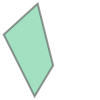

In [95]:
polygon

In [99]:
polygon.contains(Point(0, 50))

True

In [68]:
row.lat

0.4

In [69]:
row.lng

49.5

In [79]:
polygon.contains(point)

False

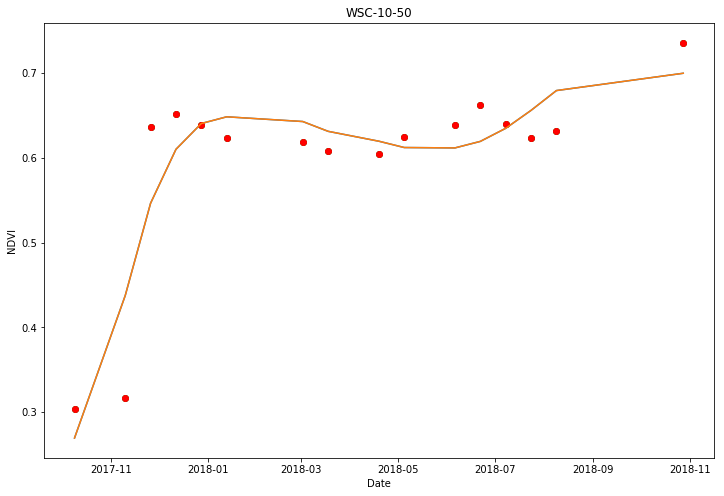

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

data2 = StringIO("""

date        value
09-Oct-17   0.304
10-Nov-17   0.316
26-Nov-17   0.636
12-Dec-17   0.652
28-Dec-17   0.639
13-Jan-18   0.623
02-Mar-18   0.619
18-Mar-18   0.608
19-Apr-18   0.605
05-May-18   0.625
06-Jun-18   0.639
22-Jun-18   0.663
08-Jul-18   0.64
24-Jul-18   0.623
09-Aug-18   0.632
28-Oct-18   0.736
""")

df2 = pd.read_table(data2, delim_whitespace=True)

df2.loc[:, "date"] = pd.to_datetime(df2.loc[:, "date"], format="%d-%b-%y")

y_values2 = df2.loc[:, "value"]
x_values2 = np.linspace(0,1,len(df2.loc[:, "value"]))
poly_degree = 4

coeffs2 = np.polyfit(x_values2, y_values2, poly_degree)
poly_eqn2 = np.poly1d(coeffs2)
y_hat2 = poly_eqn2(x_values2)

plt.figure(figsize=(12,8))

plt.plot(df2.loc[:, "date"], df2.loc[:,"value"] ,"ro",color='green')
plt.plot(df2.loc[:, "date"],y_hat2)
plt.plot(df2.loc[:, "date"], df2.loc[:,"value"] ,"ro",color='red')
plt.plot(df2.loc[:, "date"],y_hat2)
plt.title('WSC-10-50')
plt.ylabel('NDVI')
plt.xlabel('Date')
plt.savefig("NDVI_plot.png")

In [10]:
y_hat2

array([0.26920034, 0.43744672, 0.54649007, 0.61012786, 0.64057918,
       0.64848469, 0.64290665, 0.63132892, 0.61965691, 0.61221766,
       0.61175977, 0.61945345, 0.63489048, 0.65608424, 0.67946969,
       0.69990338])

In [ ]:
import yaml
import os

template_yaml = 'ex.yaml'
# In this same folder you would find flavor2, flavor3, flavor4, etc, lets just use 1 for now
data_yaml = os.path.abspath(os.path.join(os.path.dirname(__file__), 'data_files', 'flavor1.yaml'))
# This is where we dump the filled out template the app will actually use
output_directory = os.path.abspath(os.path.join(os.path.dirname(__file__), os.path.pardir))

with open(template_yaml, 'r') as template:
    try:
        loaded_template = yaml.load(template)  # Load the template as a dict
        with open(data_yaml , 'r') as data:
            loaded_data= yaml.load(data)  # Load the data as a dict
        # From this point on I am basically just setting individual keys from "loaded_template" to values in "loaded_data"
        # But 1 at a time, which is what I am trying to avoid:
        loaded_template['id'] = loaded_data['id']
        loaded_template['endpoints']['url1'] = loaded_template['endpoints']['url1'].format(loaded_data['id'])
        loaded_template['foo']['bar']['deeply']['nested'] = loaded_data['id']

In [57]:
new_file = []

# New id for replacement
id_ = '123'

# Open file 
with open('ex.yaml', 'r') as f:
    # Iterate through each line
    for l in f:
        # Replace every id occurrence
        new_file.append(l.replace('{id}', id_))

# Save the new file
with open('new_file.yaml', 'w') as f:
    for l in new_file:
        f.write(l)

In [56]:
new_file

['---\n',
 'id: 123\n',
 'endpoints:\n',
 '  url1: https://website.com/123/search\n',
 '  url2: https://website.com/foo/123/get_thing\n',
 '  url3: https://website.com/hello/world/123/trigger_stuff\n',
 'foo:\n',
 '  bar:\n',
 '    deeply:\n',
 '      nested: 123',
 ['---\n'],
 ['id: 123\n'],
 ['endpoints:\n'],
 ['  url1: https://website.com/123/search\n'],
 ['  url2: https://website.com/foo/123/get_thing\n'],
 ['  url3: https://website.com/hello/world/123/trigger_stuff\n'],
 ['foo:\n'],
 ['  bar:\n'],
 ['    deeply:\n'],
 ['      nested: 123'],
 '---\n',
 'id: 123\n',
 'endpoints:\n',
 '  url1: https://website.com/123/search\n',
 '  url2: https://website.com/foo/123/get_thing\n',
 '  url3: https://website.com/hello/world/123/trigger_stuff\n',
 'foo:\n',
 '  bar:\n',
 '    deeply:\n',
 '      nested: 123']

In [47]:
t

['---\n',
 'id: {id}\n',
 'endpoints:\n',
 '  url1: https://website.com/{id}/search\n',
 '  url2: https://website.com/foo/{id}/get_thing\n',
 '  url3: https://website.com/hello/world/{id}/trigger_stuff\n',
 'foo:\n',
 '  bar:\n',
 '    deeply:\n',
 '      nested: {id}']

In [50]:
id_ = 123
new_file = [i.replace('{id}', str(id_)) for i in t]
new_file

['---\n',
 'id: 123\n',
 'endpoints:\n',
 '  url1: https://website.com/123/search\n',
 '  url2: https://website.com/foo/123/get_thing\n',
 '  url3: https://website.com/hello/world/123/trigger_stuff\n',
 'foo:\n',
 '  bar:\n',
 '    deeply:\n',
 '      nested: 123']

In [51]:
with open('new_file.yaml', 'w') as f:
    for i in new_file:
        f.write(i)

In [39]:
doc

"{'id': {'id': None}, 'endpoints': {'url1': 'https://website.com/{id}/search', 'url2': 'https://website.com/foo/{id}/get_thing', 'url3': 'https://website.com/hello/world/{id}/trigger_stuff'}, 'foo': {'bar': {'deeply': {'nested': {'id': None}}}}}"

In [16]:
new_file

In [19]:
new_file = open('ex.yaml', 'r').read()
new_file

''

In [18]:
with open('ex.yaml', 'r') as f:
    new_file = yaml.load(f.read())
    
new_file

In [ ]:
id: {{id}}
endpoints:
  url1: https://website.com/{{id}}/search
  url2: https://website.com/foo/{{id}}/get_thing
  url3: https://website.com/hello/world/{{id}}/trigger_stuff
foo:
  bar:
    deeply:
      nested: {{id}}

In [59]:
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.model_selection import train_test_split

def main():
    mylist = [
    {'Id':101,'Username':"john",'Date':1475359200,'Announcement':111,'Result':50},
    {'Id':104,'Username':"john",'Date':1475359905,'Announcement':40,'Result':23},
    {'Id':222,'Username':"dave",'Date':1475399212,'Announcement':600,'Result':420},
    {'Id':301,'Username':"john",'Date':1475559256,'Announcement':300,'Result':150},
    {'Id':407,'Username':"dave",'Date':1475659277,'Announcement':10,'Result':8}
    ]

    df = pd.DataFrame(mylist)
    df['Username'] =  pd.Series(pd.factorize(df['Username'])[0] + 1).astype('category')
    y = df['Result'].values
    df = df.drop('Result', axis=1)
    X_train, X_test, y_train, y_test = train_test_split(df, y, random_state=2)
    clf = LinearRegression()
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    predictions = [p if p < a else a for p, a in zip(predictions, X_test['Announcement'])]
    print("predictions")
    print(predictions)
    print("true values")
    print(y_test)

if __name__ == '__main__':
    main()

predictions
[255.81049569325114, 10]
true values
[420   8]
